## <center> Import Libs

In [58]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = (13, 8)
plt.rcParams["font.size"] = 14

import seaborn as sns
# Customizing seaborn color palette
sns.light_palette("seagreen", as_cmap=True)
sns.set(style="darkgrid")

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

import plotly.express as px
import plotly.figure_factory as ff
import plotly.io as pio
pio.renderers.default = "notebook_connected"

import warnings 
warnings.filterwarnings('ignore')


from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

from nltk.corpus import stopwords
import string
import nltk
import re
nltk.download('stopwords')
nltk.download('vader_lexicon')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/andrejbaranov/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/andrejbaranov/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

## <center> Import Data

In [59]:
data = pd.read_csv(
    'data/bbc-news.csv',
    usecols= ['content', 'category']
)
data.head()

,category,content
0,business,Quarterly profits at US media giant TimeWarne...
1,business,The dollar has hit its highest level against ...
2,business,The owners of embattled Russian oil giant Yuk...
3,business,British Airways has blamed high fuel prices f...
4,business,Shares in UK drinks and food firm Allied Dome...


## <center> Data Info

In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  2225 non-null   object
 1   content   2225 non-null   object
dtypes: object(2)
memory usage: 34.9+ KB


In [61]:
data.describe()

,category,content
count,2225,2225
unique,5,2092
top,sport,Microsoft has warned PC users to update their...
freq,511,2


## <center> Null values / Duplicates

In [62]:
data.isnull().sum()

category    0
content     0
dtype: int64

In [63]:
print(f'Duplicated data: {data.duplicated().sum()}')

Duplicated data: 133


In [64]:
data.drop_duplicates(inplace=True)
print(f'Duplicated data after dropping: {data.duplicated().sum()}')

Duplicated data after dropping: 0


## <center> Data Analysis

In [65]:
category_frequency = data['category'].value_counts().values
category_names = data['category'].value_counts().index

px.pie(
    names=category_names,
    values=category_frequency,
    hole=0.4,
    title="Sentiments Ratio"
)

## <center> Wordcloud

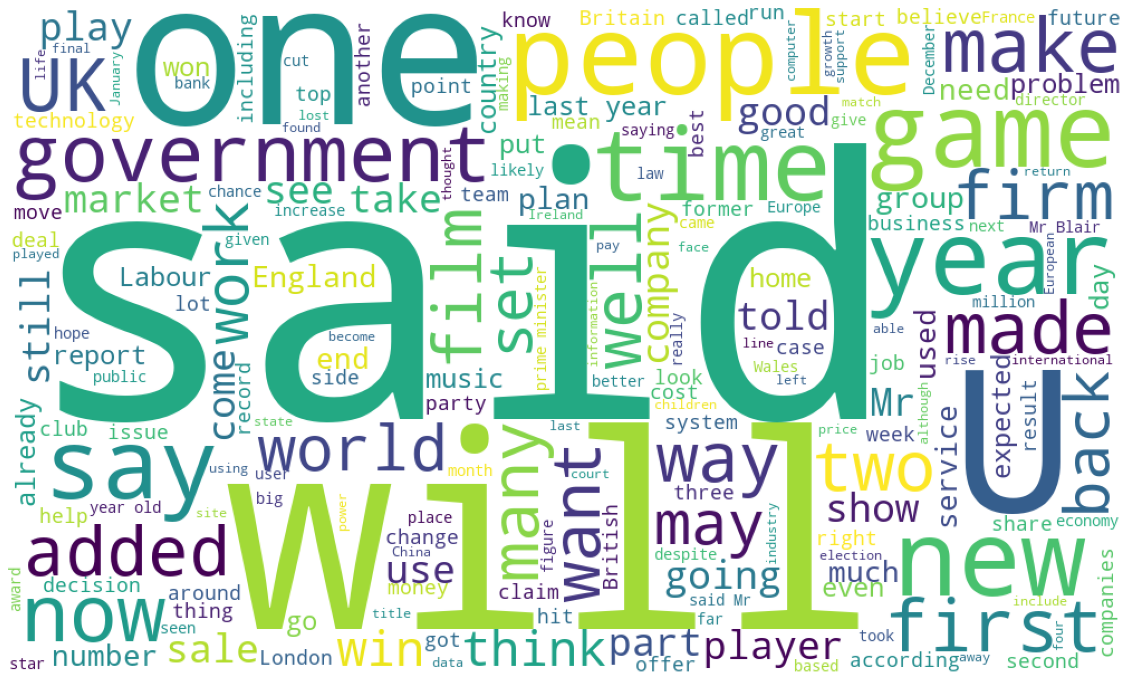

In [66]:
text = " ".join(i for i in data.content)

stopwords = set(STOPWORDS)

wordcloud = WordCloud(
    stopwords=stopwords, 
    background_color="white",
    width=1000,
    height=600,
    prefer_horizontal=0.9
).generate(text)

plt.figure(figsize=(20,15))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

## <center> Dividing into X and y

In [67]:
X = data['content']
y = data['category']

## <center> Transforming data

In [68]:
from sklearn.feature_extraction.text import CountVectorizer


tfidf = CountVectorizer(ngram_range=(1,3))
X = tfidf.fit_transform(X)

print(f"X shape: {X.shape}")

X shape: (2092, 958997)


## <center> Train / Test split

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.1, random_state=1)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (1882, 958997)
X_test shape: (210, 958997)
y_train shape: (1882,)
y_test shape: (210,)


## <center> Modeling 

In [70]:
model = MultinomialNB()
model.fit(X_train, y_train)

print(f'Model score: {model.score(X_test, y_test)}')

Model score: 0.9666666666666667


## <center> Classification Report

In [71]:
from sklearn.metrics import classification_report

print(
    classification_report(
        y_true=y_test, 
        y_pred=model.predict(X_test)
    )
)

               precision    recall  f1-score   support

     business       1.00      0.98      0.99        51
entertainment       1.00      0.84      0.91        37
     politics       0.91      1.00      0.95        39
        sport       1.00      1.00      1.00        44
         tech       0.93      1.00      0.96        39

     accuracy                           0.97       210
    macro avg       0.97      0.96      0.96       210
 weighted avg       0.97      0.97      0.97       210

